# Fixed Points and Linearization

Find all the fixed points of the system: 
$$\dot{x} = -x + x^3$$

$$\dot{y} = -2y$$

and use linearisation to classify them. Then check your conclusions by deriving the phase portrait for the full non-linear system.

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define symbols
x, y = sp.symbols("x y")

In [3]:
# Define the system
x_dot = -x + x**3
y_dot = -2*y

# Get Fixed Points
fixed_points = sp.solve((x_dot, y_dot), (x, y))
print(f"Fixed Points: {fixed_points}\n")

Fixed Points: [(-1, 0), (0, 0), (1, 0)]



In [4]:
print(fixed_points[2])

(1, 0)


In [5]:
# Jacobian Matrix
F = sp.Matrix([x_dot, y_dot])
V = sp.Matrix([x, y])
J = F.jacobian(V)
print(f"Jacobian J(x, y):\n{J}\n")

Jacobian J(x, y):
Matrix([[3*x**2 - 1, 0], [0, -2]])



In [6]:
# Classification by Linearisation

for fp in fixed_points:
    
    # Get coordinates of fixed points
    x_fp, y_fp = fp
    
    # Jacobian matrix evaluation
    J_fp = J.subs({x: x_fp, y: y_fp})

    # Print eigenvalues
    eigenvals = J_fp.eigenvals()

    print(fp, eigenvals.keys())

(-1, 0) dict_keys([2, -2])
(0, 0) dict_keys([-1, -2])
(1, 0) dict_keys([2, -2])


In [7]:
# Set limits
x_min, x_max = -3., 3.
y_min, y_max = -3., 3.

# Generate axes
x_1d = np.linspace(x_min, x_max, 20)
y_1d = np.linspace(y_min, y_max, 20)

# Create meshgrid
x_2d, y_2d = np.meshgrid(x_1d, y_1d)

# Compute the vector components at each grid point
u_2d = -x_2d + x_2d**3  # dx/dt
v_2d = -2*y_2d                 # dy/dt

# Normalise the vectors for plotting
mag = np.sqrt(u_2d**2 + v_2d**2)
u_2d = u_2d / mag
v_2d = v_2d / mag

In [8]:
# Define nullclines
# y-nullcline (y = 0)
y_null = 0

# x-nullcline (x = -e^{-y})
x_null1 = 0.
x_null2 = -1.
x_null3 = +1.

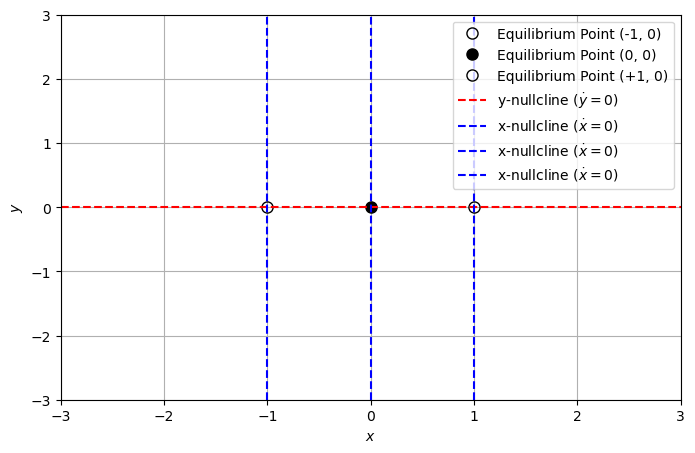

In [9]:
plt.figure(figsize=(8, 5))

# Plot the equilibrium points
plt.plot(fixed_points[0][0],fixed_points[0][1], 'ko', markersize=8, label='Equilibrium Point (-1, 0)', fillstyle='none')
plt.plot(fixed_points[1][0],fixed_points[1][1], 'ko', markersize=8, label='Equilibrium Point (0, 0)')
plt.plot(fixed_points[2][0],fixed_points[2][1], 'ko', markersize=8, label='Equilibrium Point (+1, 0)', fillstyle='none')

# Plot the nullclines
plt.axhline(y_null, color='red', linestyle='--', label='y-nullcline ($\dot{y}=0$)')
plt.axvline(x_null1, color='blue', linestyle='--', label='x-nullcline ($\dot{x}=0$)')
plt.axvline(x_null2, color='blue', linestyle='--', label='x-nullcline ($\dot{x}=0$)')
plt.axvline(x_null3, color='blue', linestyle='--', label='x-nullcline ($\dot{x}=0$)')

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.legend()

plt.grid(True)

plt.show()

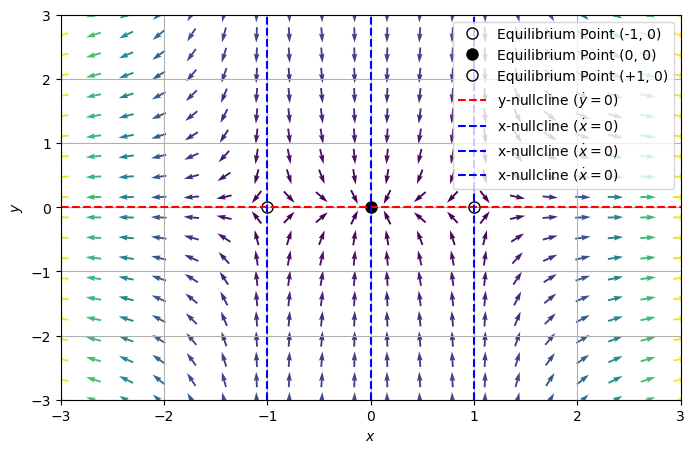

In [10]:
plt.figure(figsize=(8, 5))

# Plot the equilibrium points
plt.plot(fixed_points[0][0],fixed_points[0][1], 'ko', markersize=8, label='Equilibrium Point (-1, 0)', fillstyle='none')
plt.plot(fixed_points[1][0],fixed_points[1][1], 'ko', markersize=8, label='Equilibrium Point (0, 0)')
plt.plot(fixed_points[2][0],fixed_points[2][1], 'ko', markersize=8, label='Equilibrium Point (+1, 0)', fillstyle='none')

# Plot the nullclines
plt.axhline(y_null, color='red', linestyle='--', label='y-nullcline ($\dot{y}=0$)')
plt.axvline(x_null1, color='blue', linestyle='--', label='x-nullcline ($\dot{x}=0$)')
plt.axvline(x_null2, color='blue', linestyle='--', label='x-nullcline ($\dot{x}=0$)')
plt.axvline(x_null3, color='blue', linestyle='--', label='x-nullcline ($\dot{x}=0$)')

# Plot the direction field
plt.quiver(x_2d, y_2d, u_2d, v_2d, mag, cmap='viridis', scale=40, pivot='mid', linewidth=0.5)


plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.legend()

plt.grid(True)

plt.show()

In [11]:
from scipy.integrate import solve_ivp

In [12]:
# ODE system
def system(t, state):
    """
    pair -> [x, y]
    Returns -> [dx/dt, dy/dt]
    """
    x, y = state
    
    # Slopes
    dxdt = -x + x**3
    dydt = -2*y
    
    return [dxdt, dydt]

In [15]:
# Time axis
t_lims = [0., 5.]
t_axis = np.linspace(t_lims[0], t_lims[1], 100)

# A list of ICs [x0, y0]
ics = [
    [-2., -2.],
    [-0.5, 1.],
    [1.25,-2.],
]

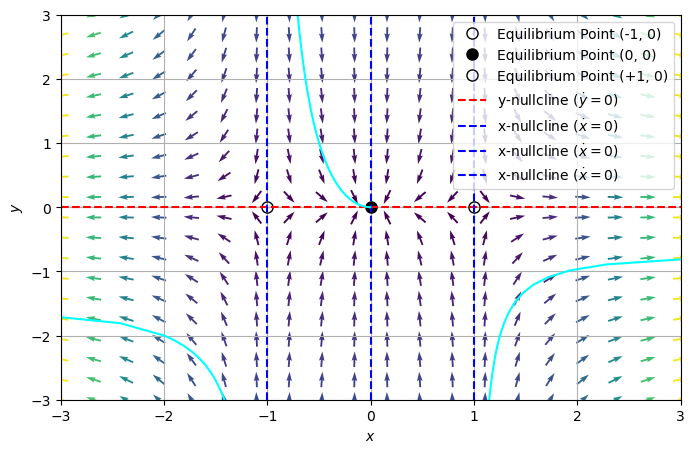

In [16]:
plt.figure(figsize=(8, 5))

# Plot the equilibrium points
plt.plot(fixed_points[0][0],fixed_points[0][1], 'ko', markersize=8, label='Equilibrium Point (-1, 0)', fillstyle='none')
plt.plot(fixed_points[1][0],fixed_points[1][1], 'ko', markersize=8, label='Equilibrium Point (0, 0)')
plt.plot(fixed_points[2][0],fixed_points[2][1], 'ko', markersize=8, label='Equilibrium Point (+1, 0)', fillstyle='none')

# Plot the nullclines
plt.axhline(y_null, color='red', linestyle='--', label='y-nullcline ($\dot{y}=0$)')
plt.axvline(x_null1, color='blue', linestyle='--', label='x-nullcline ($\dot{x}=0$)')
plt.axvline(x_null2, color='blue', linestyle='--', label='x-nullcline ($\dot{x}=0$)')
plt.axvline(x_null3, color='blue', linestyle='--', label='x-nullcline ($\dot{x}=0$)')

# Plot the direction field
plt.quiver(x_2d, y_2d, u_2d, v_2d, mag, cmap='viridis', scale=40, pivot='mid', linewidth=0.5)

# Integrate and plot trajectories
for x0, y0 in ics:
    # Integrate and plot trajectories
    sol = solve_ivp(system, t_lims, [x0, y0], t_eval=t_axis, method='RK45')
    plt.plot(sol.y[0], sol.y[1], color='cyan')

    # Integrate and plot reverse-time trajectories
    sol_r = solve_ivp(system, [0., -4.], [x0, y0], t_eval=np.linspace(0., -4., 200), method='RK45')
    plt.plot(sol_r.y[0], sol_r.y[1], color='cyan')

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.legend()

plt.grid(True)

plt.show()